### Exploring Credit Risks

This activity is another open exploration of a dataset using both cleaning methods and visualizations.  The data describes customers as good or bad credit risks based on a small set of features specified below.  Your task is to create a Jupyter notebook with an exploration of the data using both your `pandas` cleaning and analysis skills and your visualization skills using `matplotlib`, `seaborn`, and `plotly`.  Your final notebook should be formatted with appropriate headers and markdown cells with written explanations for the code that follows. 

Post your notebook file in Canvas, as well as a brief (3-4 sentence) description of what you found through your analysis. Respond to your peers with reflections on thier analysis. 

-----


##### Data Description

```
1. Status of existing checking account, in Deutsche Mark.
2. Duration in months
3. Credit history (credits taken, paid back duly, delays, critical accounts)
4. Purpose of the credit (car, television,...)
5. Credit amount
6. Status of savings account/bonds, in Deutsche Mark.
7. Present employment, in number of years.
8. Installment rate in percentage of disposable income
9. Personal status (married, single,...) and sex
10. Other debtors / guarantors
11. Present residence since X years
12. Property (e.g. real estate)
13. Age in years
14. Other installment plans (banks, stores)
15. Housing (rent, own,...)
16. Number of existing credits at this bank
17. Job
18. Number of people being liable to provide maintenance for
19. Telephone (yes,no)
20. Foreign worker (yes,no)
```

In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv('/Users/jaikumar/Desktop/Berkeley_ML/try-it_4.2_starter/data/dataset_31_credit-g.csv')

In [3]:
# Display the few rows of the dataframe
df.head(3)

checking_status  duration                    credit_history    purpose  \
0            '<0'         6  'critical/other existing credit'   radio/tv   
1      '0<=X<200'        48                   'existing paid'   radio/tv   
2   'no checking'        12  'critical/other existing credit'  education   

   credit_amount      savings_status employment  installment_commitment  \
0           1169  'no known savings'      '>=7'                       4   
1           5951              '<100'   '1<=X<4'                       2   
2           2096              '<100'   '4<=X<7'                       2   

        personal_status other_parties  ...  property_magnitude age  \
0         'male single'          none  ...       'real estate'  67   
1  'female div/dep/mar'          none  ...       'real estate'  22   
2         'male single'          none  ...       'real estate'  49   

   other_payment_plans housing existing_credits                   job  \
0                 none     own                2               skilled   
1                 none     own                1               skilled   
2                 none     own                1  'unskilled resident'   

  num_dependents  own_telephone foreign_worker class  
0              1            yes            yes  good  
1              1           none            yes   bad  
2              2           none            yes  good  

[3 rows x 21 columns]

In [4]:
# display summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [5]:
# Number of data rowsz
df.shape[0]

1000

In [6]:
# display Statistical summary of numerical columns
df.describe()

duration  credit_amount  installment_commitment  residence_since  \
count  1000.000000    1000.000000             1000.000000      1000.000000   
mean     20.903000    3271.258000                2.973000         2.845000   
std      12.058814    2822.736876                1.118715         1.103718   
min       4.000000     250.000000                1.000000         1.000000   
25%      12.000000    1365.500000                2.000000         2.000000   
50%      18.000000    2319.500000                3.000000         3.000000   
75%      24.000000    3972.250000                4.000000         4.000000   
max      72.000000   18424.000000                4.000000         4.000000   

               age  existing_credits  num_dependents  
count  1000.000000       1000.000000     1000.000000  
mean     35.546000          1.407000        1.155000  
std      11.375469          0.577654        0.362086  
min      19.000000          1.000000        1.000000  
25%      27.000000          1.000000        1.000000  
50%      33.000000          1.000000        1.000000  
75%      42.000000          2.000000        1.000000  
max      75.000000          4.000000        2.000000

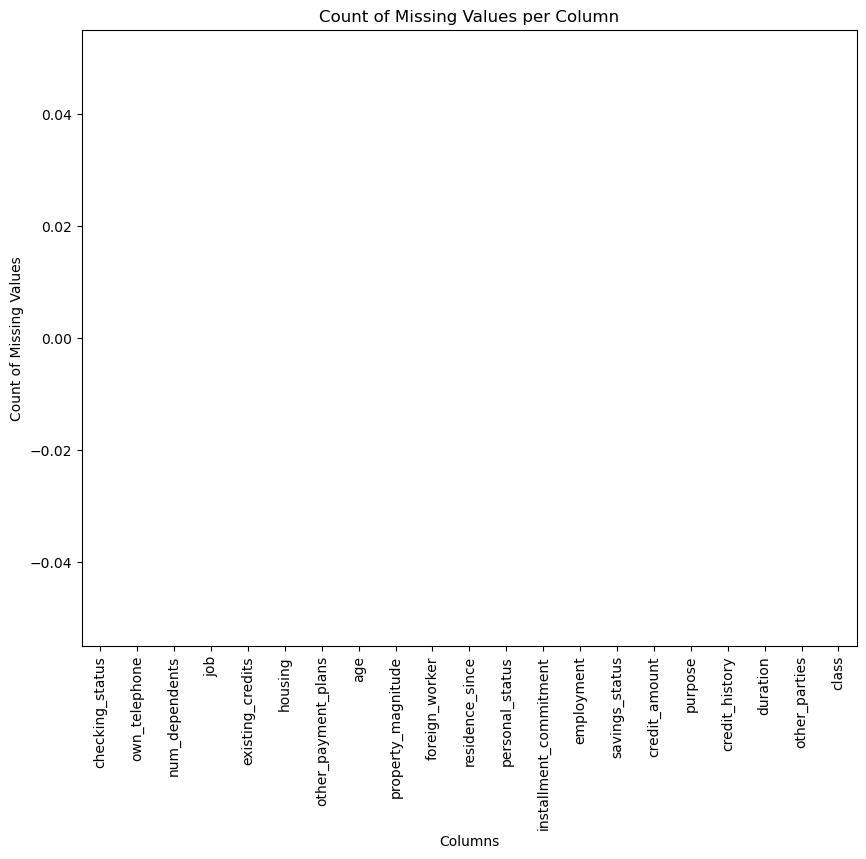

In [7]:
# Data Cleanup - Check for missing values
missing_counts = df.isnull().sum()

# 2. Sort the counts
sorted_counts = missing_counts.sort_values()

# 3. Create the bar plot
plt.figure(figsize=(10, 8))
sorted_counts.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.title('Count of Missing Values per Column')
plt.show()

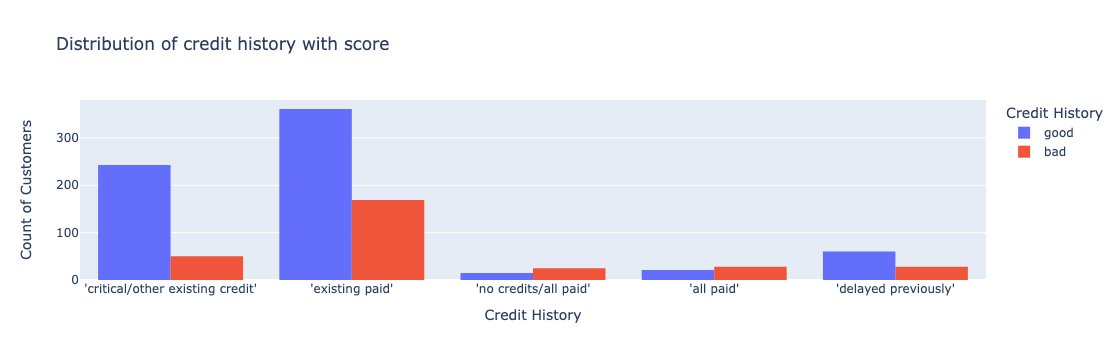

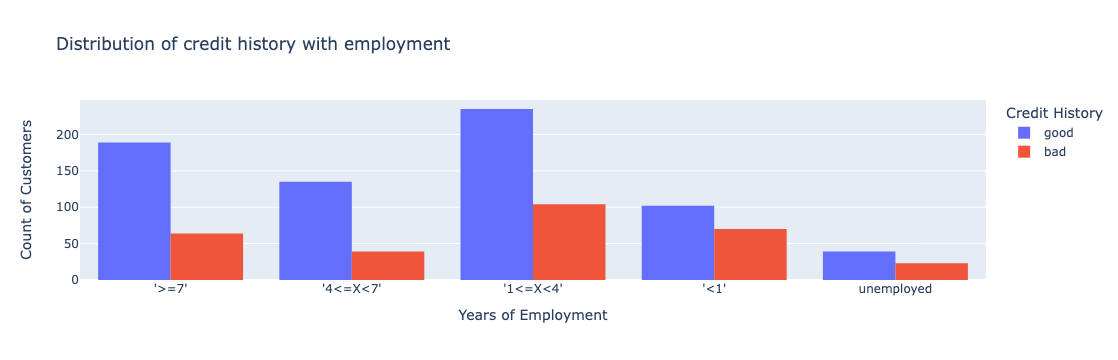

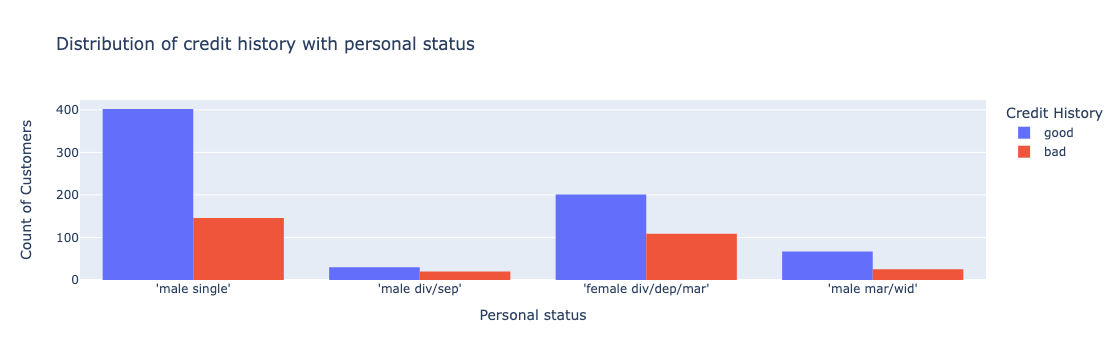

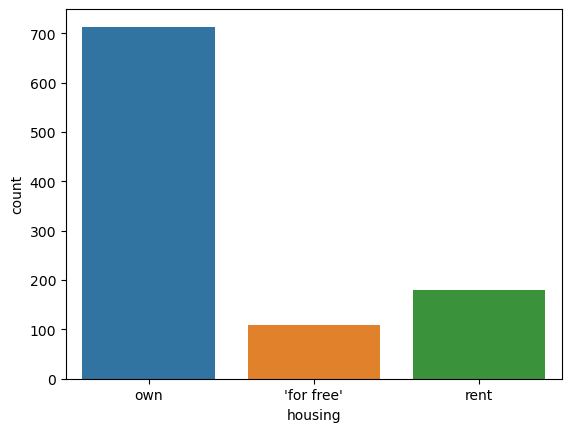

In [8]:
# looking at the different features and assessing the best model

# Plotly histogram wth Credit history 
fig = px.histogram(df, x='credit_history', color='class',
                   barmode='group', title='Distribution of credit history with score')

# Update the layout for clarity
fig.update_layout(xaxis_title='Credit History',
                  yaxis_title='Count of Customers',
                  legend_title='Credit History')

# Show the plot
fig.show()

# Plotly histogram wth age of employment
fig = px.histogram(df, x='employment', color='class',
                   barmode='group', title='Distribution of credit history with employment')

# Update the layout for clarity
fig.update_layout(xaxis_title='Years of Employment',
                  yaxis_title='Count of Customers',
                  legend_title='Credit History')

# Show the plot
fig.show()

# Plotly histogram wth sex
fig = px.histogram(df, x='personal_status', color='class',
                   barmode='group', title='Distribution of credit history with personal status')

# Update the layout for clarity
fig.update_layout(xaxis_title='Personal status',
                  yaxis_title='Count of Customers',
                  legend_title='Credit History')

# Show the plot
fig.show()

# Seborn countplot on housing data
sns.countplot(x='housing', data=df)
plt.show()




/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



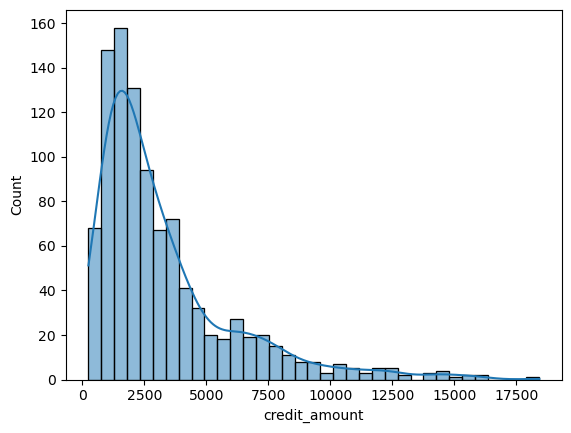

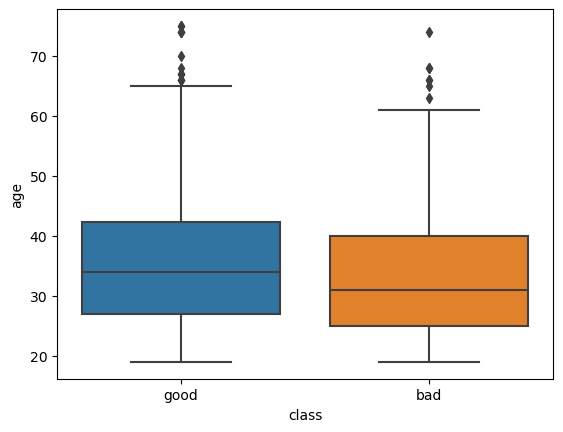

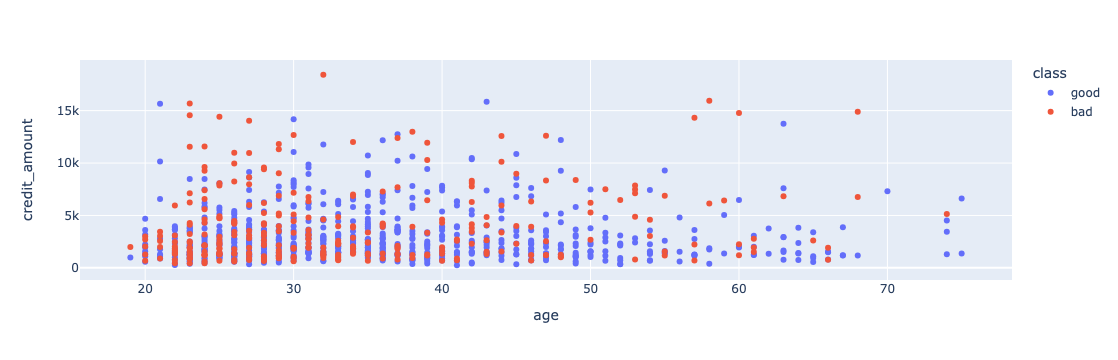

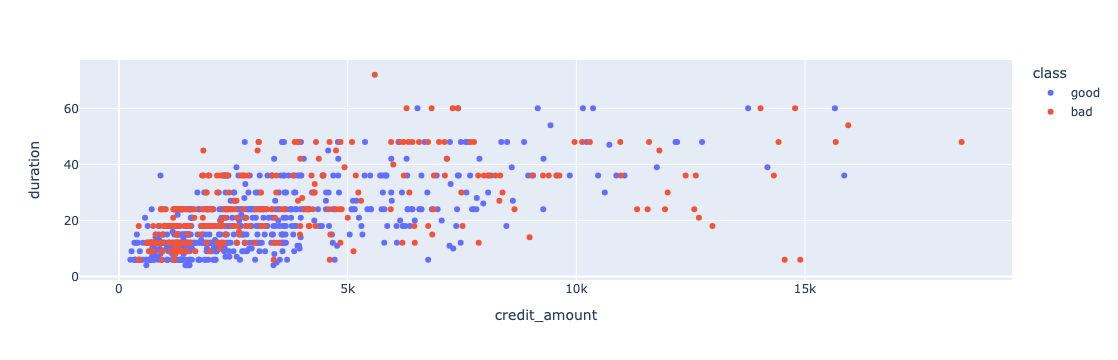

In [9]:
# Histogram of credit amount
sns.histplot(df['credit_amount'], kde=True)
plt.show()

# Boxplot of age by class
sns.boxplot(x='class', y='age', data=df)
plt.show()

# Interactive scatter plot with Plotly
fig = px.scatter(df, x='age', y='credit_amount', color='class')
fig.show()

fig = px.scatter(df, x='credit_amount', y='duration', color='class')
fig.show()

In [10]:
CHV = df['credit_history'].unique().tolist()
CHV

# Mapping of string values to integers
mapping = {
    "'critical/other existing credit'": -1,
    "'existing paid'": 0,
    "'delayed previously'": 0,
    "'no credits/all paid'": 1,
    "'all paid'": 1
}

# Replace string values with integers
df['credit_history'] = df['credit_history'].replace(mapping)

print(df)

    checking_status  duration  credit_history              purpose  \
0              '<0'         6              -1             radio/tv   
1        '0<=X<200'        48               0             radio/tv   
2     'no checking'        12              -1            education   
3              '<0'        42               0  furniture/equipment   
4              '<0'        24               0            'new car'   
..              ...       ...             ...                  ...   
995   'no checking'        12               0  furniture/equipment   
996            '<0'        30               0           'used car'   
997   'no checking'        12               0             radio/tv   
998            '<0'        45               0             radio/tv   
999      '0<=X<200'        45              -1           'used car'   

     credit_amount      savings_status  employment  installment_commitment  \
0             1169  'no known savings'       '>=7'                       4   
1  

In [11]:
EMP = df['employment'].unique().tolist()
print(EMP)

# Mapping of string values to integers
mapping = {
    "'>=7'": 3,
    "'1<=X<4'": 1,
    "'4<=X<7'": 2,
    'unemployed': 0,
    "'<1'": 0
}

# Replace string values with integers
df['employment'] = df['employment'].replace(mapping)

print(df)

["'>=7'", "'1<=X<4'", "'4<=X<7'", 'unemployed', "'<1'"]
    checking_status  duration  credit_history              purpose  \
0              '<0'         6              -1             radio/tv   
1        '0<=X<200'        48               0             radio/tv   
2     'no checking'        12              -1            education   
3              '<0'        42               0  furniture/equipment   
4              '<0'        24               0            'new car'   
..              ...       ...             ...                  ...   
995   'no checking'        12               0  furniture/equipment   
996            '<0'        30               0           'used car'   
997   'no checking'        12               0             radio/tv   
998            '<0'        45               0             radio/tv   
999      '0<=X<200'        45              -1           'used car'   

     credit_amount      savings_status  employment  installment_commitment  \
0             1169  'no k

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   duration                1000 non-null   int64
 1   credit_amount           1000 non-null   int64
 2   employment              1000 non-null   int64
 3   credit_history          1000 non-null   int64
 4   installment_commitment  1000 non-null   int64
 5   residence_since         1000 non-null   int64
 6   age                     1000 non-null   int64
 7   existing_credits        1000 non-null   int64
 8   num_dependents          1000 non-null   int64
 9   class                   1000 non-null   int64
dtypes: int64(10)
memory usage: 78.3 KB
Correlation Matrix
                        duration  credit_amount  employment  credit_history  \
duration                1.000000       0.624984    0.061587       -0.009047   
credit_amount           0.624984       1.000000    0.009659      

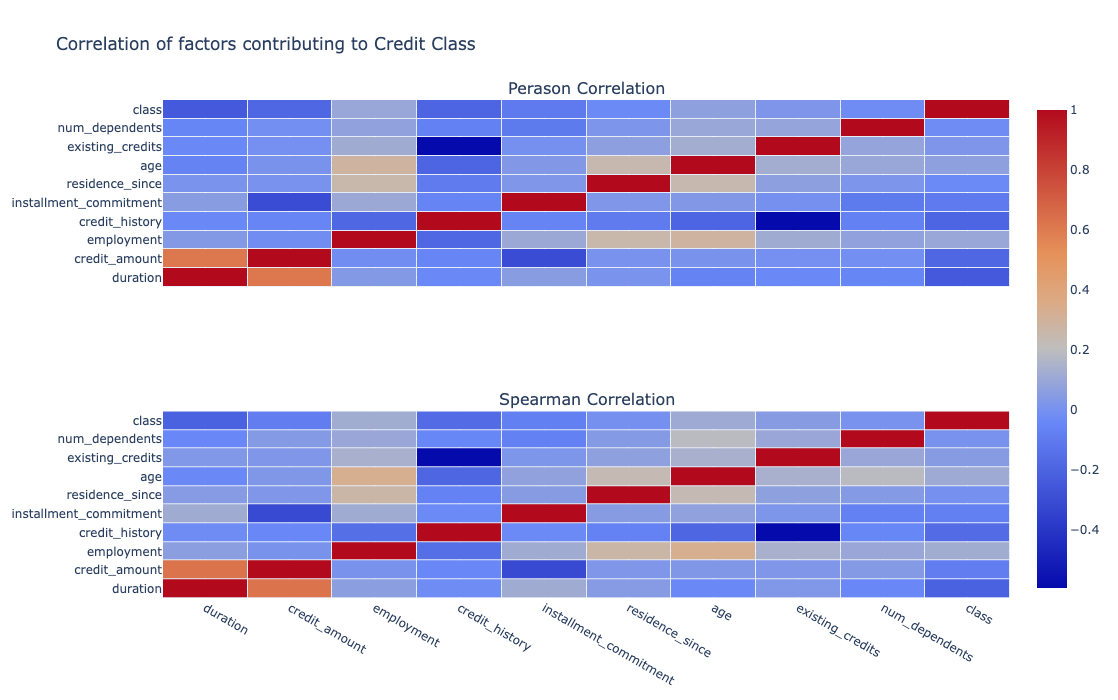

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed

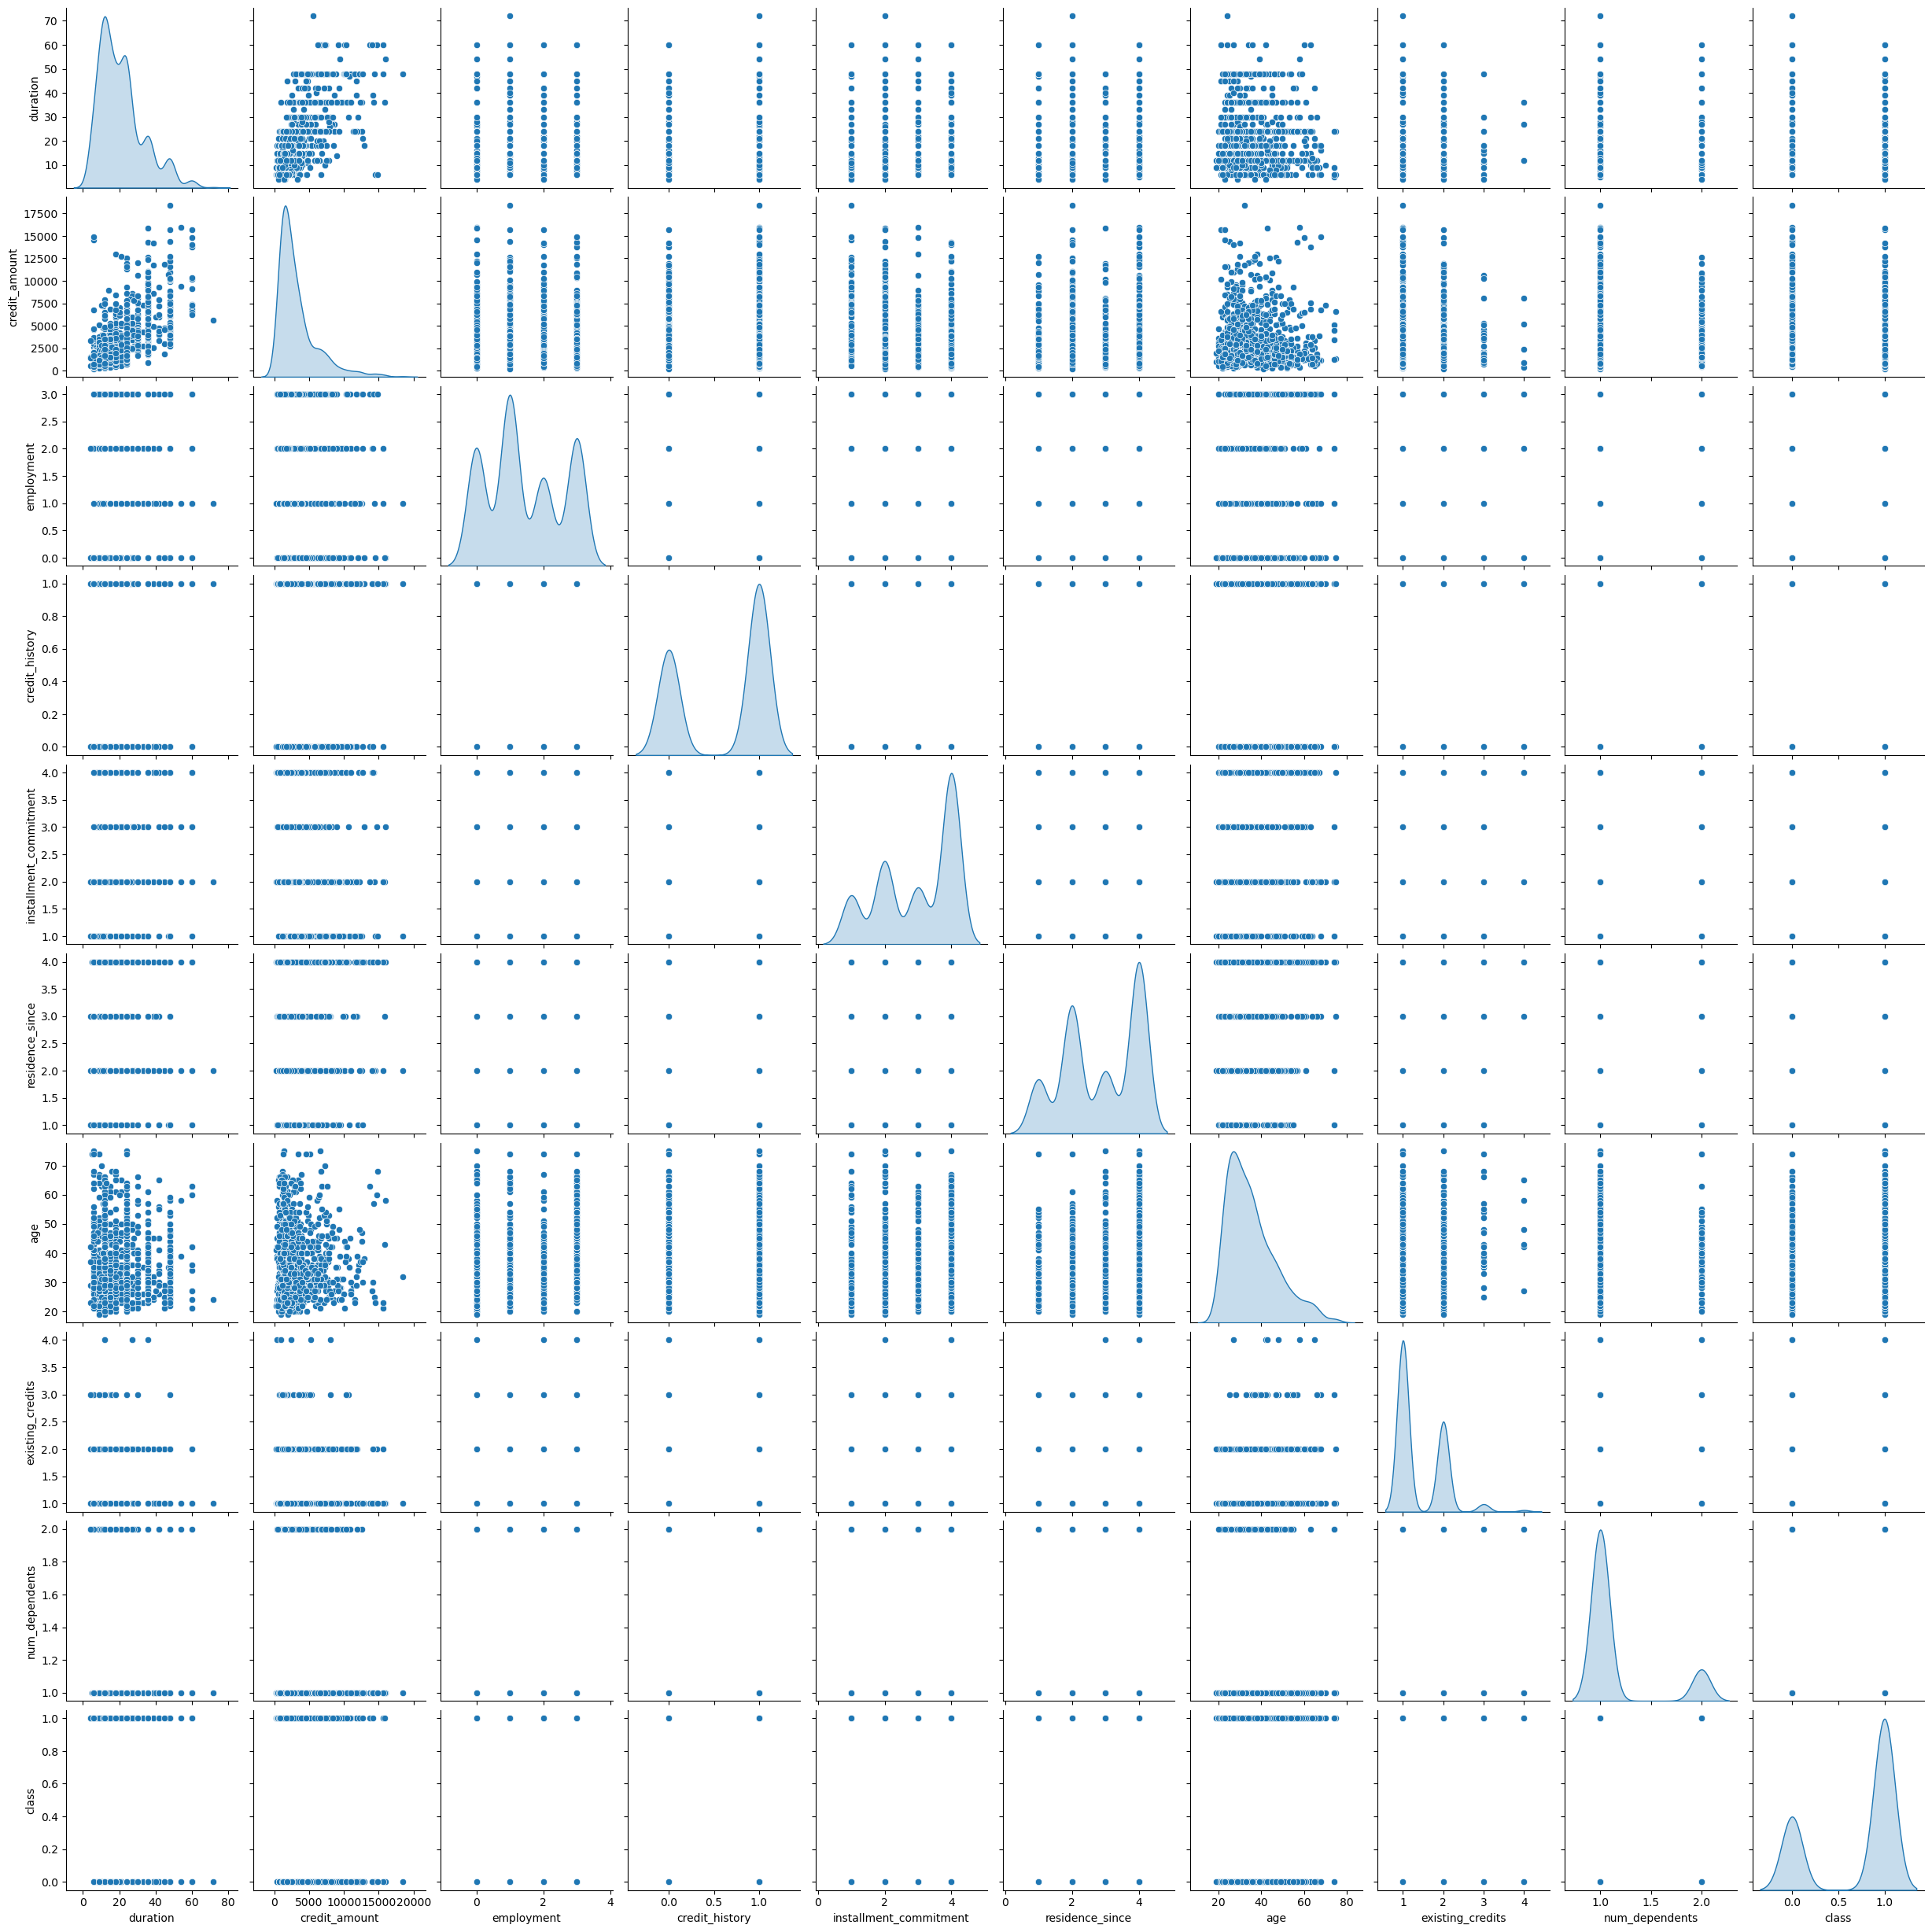

In [103]:
# correlation of the factors with credit rating 
df['class'] = df['class'].replace({'bad':0,'good':1}).astype(np.int64)
df_corr_col = df[['duration', 'credit_amount', 'employment','credit_history','installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents', 'class']]
df_corr_col.info()

# Printing the correlation/ Cov matrix
print("================================================================")
print("Correlation Matrix")
print("================================================================")
print(df_corr_col.corr())


fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Perason Correlation',  'Spearman Correlation'))
colorscale=     [[1.0              , "rgb(165,0,38)"],
                [0.8888888888888888, "rgb(215,48,39)"],
                [0.7777777777777778, "rgb(244,109,67)"],
                [0.6666666666666666, "rgb(253,174,97)"],
                [0.5555555555555556, "rgb(254,224,144)"],
                [0.4444444444444444, "rgb(224,243,248)"],
                [0.3333333333333333, "rgb(171,217,233)"],
                [0.2222222222222222, "rgb(116,173,209)"],
                [0.1111111111111111, "rgb(69,117,180)"],
                [0.0               , "rgb(49,54,149)"]]

d_val = df_corr_col.corr('pearson')
d_idx = d_val.index
d_col = d_val.columns
d_val = d_val.values
fig.add_trace(
    go.Heatmap(x=d_col,y=d_idx,z=d_val,name='pearson',showscale=False,xgap=1,ygap=1,colorscale=colorscale),
    row=1, col=1
)


d_val = df_corr_col.corr('spearman')
d_idx = d_val.index
d_col = d_val.columns
d_val = d_val.values
fig.add_trace(
    go.Heatmap(x=d_col,y=d_idx,z=d_val,xgap=1,ygap=1,colorscale=colorscale),
    row=2, col=1
)

fig.update_layout(height=700, width=900, title_text="Correlation of factors contributing to Credit Class")
fig.show()

# finally getting a pairplot on the dataset
sns.pairplot(df_corr_col, diag_kind='kde', kind='scatter')
plt.show()
